# pyVoltic: Custom probability generating functions

Custom probability generating functions can be used with any of the models with ease, in this notebook I will show you three ways which you can use custom probability generating functions:
- Writing your own 3 functions
- Using a degree distribution dictionary
- Using a network

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import sys
import networkx as nx
import numpy as np

In [3]:
sys.path.append('../')

In [4]:
import pyvoltic.probability_generating_functions as pgf

In [21]:
from pyvoltic.models import SIRNE

We will first look at writing out the probability generating function which represents a network where 50% of nodes have 1 edge and the other have 3 edges. 

Then we will pass the degree distribution dictionary, then we will use a configuration model to create a network, the first 2 graphs will look the same whereas the last graph may look slightly different due to the random sampling.

In [6]:
def pgf_calc_g( x ):
    return 0 + 0.5*x + 0*x**2 + 0.5*x**3
    
def pgf_calc_g1( x): 
    return 0.5 + 2*0*x + 3*0.5*x**2
    
def pgf_calc_g2( x):
    return 3*0.5*2*x

In [7]:
sir_ne = SIRNE(pgf_calc_g, 
      pgf_calc_g1,
      pgf_calc_g2) 

In [8]:
sir_ne_rez = sir_ne.run_simulation(r = 1, 
                                   mu = 0.2, 
                                   rho = 0.01, 
                                   epsilon = 0.0001, 
                                   timesteps = 60)

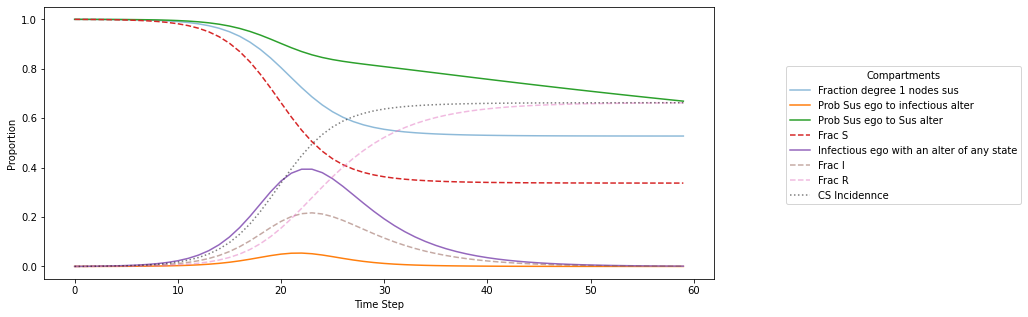

In [9]:
sir_ne_rez.full_simulation()

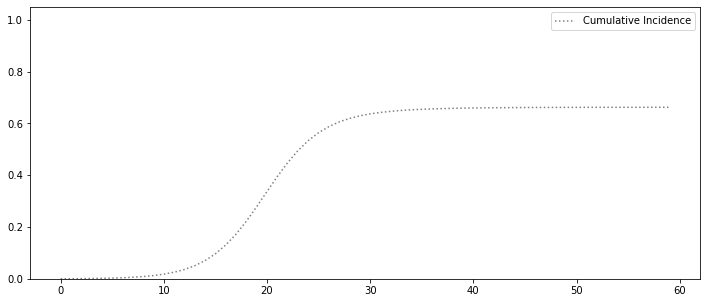

In [10]:
sir_ne_rez.cumulative_incidence()

The probability generating function can also be represented as a dictionary where the key is the number of edges and the value is the probability.

The following 2 methods are derived from functions from the Epidemics On Networks package, it is a fantastic package and book I would encourage you to read it if you are interested in this area.

In [11]:
sir_ne_dg = SIRNE(degree_dist= {1:0.5, 3:0.5}) 

In [12]:
sir_ne_dg_rez = sir_ne_dg.run_simulation(r = 1, 
                                   mu = 0.2, 
                                   rho = 0.01, 
                                   epsilon = 0.0001, 
                                   timesteps = 60)

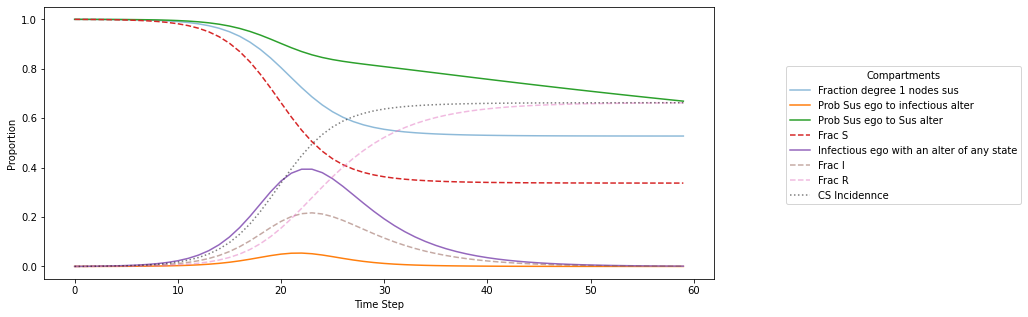

In [13]:
sir_ne_dg_rez.full_simulation()

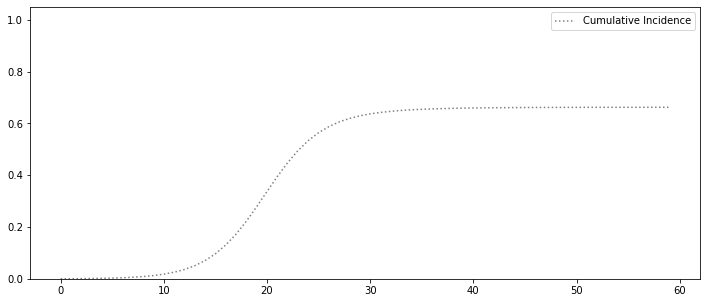

In [14]:
sir_ne_dg_rez.cumulative_incidence()

Networks can be passed through, the class will generate its own probability generating function from the distribution of the network.

In [15]:
G = nx.configuration_model(np.random.choice([1,3],size =50,))

In [16]:
sir_ne_nx = SIRNE(G= G) 

In [17]:
sir_ne_nx_rez = sir_ne_nx.run_simulation(r = 1, 
                                   mu = 0.2, 
                                   rho = 0.01, 
                                   epsilon = 0.0001, 
                                   timesteps = 60)

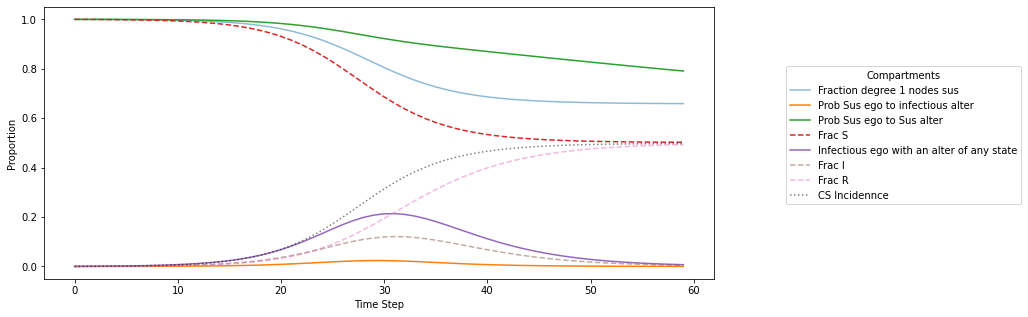

In [18]:
sir_ne_nx_rez.full_simulation()

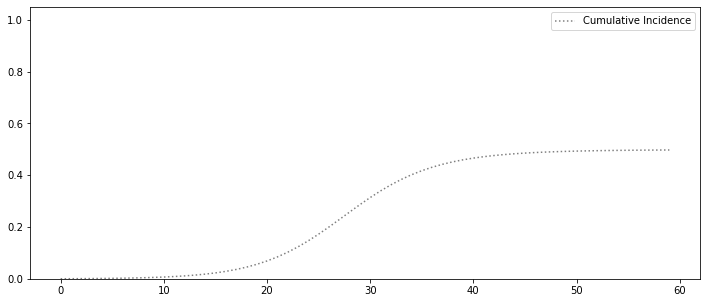

In [19]:
sir_ne_nx_rez.cumulative_incidence()